In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

,Extent,Date
0,1107873.946,1979-01-01
1,1211101.473,1979-02-01
2,1215128.770,1979-03-01
3,1233940.811,1979-04-01
4,1193061.566,1979-05-01
...,...,...
533,124025.343,2023-06-01
534,53107.426,2023-07-01
535,11242.827,2023-08-01
536,3272.024,2023-09-01


In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 3
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Barents['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((524, 12, 1), (524,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Barents_model_LT3/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2168 - root_mean_squared_error: 0.4657

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 9s 105ms/step - loss: 0.2117 - root_mean_squared_error: 0.4601 - val_loss: 0.0574 - val_root_mean_squared_error: 0.2395
Epoch 2/50
52/53 [============================>.] - ETA: 0s - loss: 0.1456 - root_mean_squared_error: 0.3815

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 6s 114ms/step - loss: 0.1453 - root_mean_squared_error: 0.3812 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2118
Epoch 3/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1033 - root_mean_squared_error: 0.3214

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 6s 112ms/step - loss: 0.1015 - root_mean_squared_error: 0.3186 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0818 - root_mean_squared_error: 0.2859

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 6s 112ms/step - loss: 0.0799 - root_mean_squared_error: 0.2827 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1732
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.0561 - root_mean_squared_error: 0.2368

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 5s 105ms/step - loss: 0.0566 - root_mean_squared_error: 0.2379 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1646
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0503 - root_mean_squared_error: 0.2244

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 6s 106ms/step - loss: 0.0469 - root_mean_squared_error: 0.2165 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1603
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0343 - root_mean_squared_error: 0.1852

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 6s 114ms/step - loss: 0.0337 - root_mean_squared_error: 0.1836 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1597
Epoch 8/50
53/53 [==============================] - ETA: 0s - loss: 0.0274 - root_mean_squared_error: 0.1654

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 6s 110ms/step - loss: 0.0274 - root_mean_squared_error: 0.1654 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1594
Epoch 9/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0240 - root_mean_squared_error: 0.1550

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 6s 118ms/step - loss: 0.0252 - root_mean_squared_error: 0.1586 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1480
Epoch 10/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0224 - root_mean_squared_error: 0.1496 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1597
Epoch 11/50
52/53 [============================>.] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.1410

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0199 - root_mean_squared_error: 0.1411 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1436
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1407

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0197 - root_mean_squared_error: 0.1402 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1228
Epoch 13/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0202 - root_mean_squared_error: 0.1421 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1383
Epoch 14/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1272
Epoch 15/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0208 - root_mean_squared_error: 0.1444

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 6s 110ms/step - loss: 0.0208 - root_mean_squared_error: 0.1443 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1125
Epoch 16/50
52/53 [============================>.] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.1393

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0194 - root_mean_squared_error: 0.1392 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1098
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0177 - root_mean_squared_error: 0.1331 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119
Epoch 18/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0178 - root_mean_squared_error: 0.1334 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 19/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1375

INFO:tensorflow:Assets written to: Barents_model_LT3\assets


INFO:tensorflow:Assets written to: Barents_model_LT3\assets


53/53 [==============================] - 5s 105ms/step - loss: 0.0192 - root_mean_squared_error: 0.1384 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1003
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0185 - root_mean_squared_error: 0.1362 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1215
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1866
Epoch 22/50
53/53 [==============================] - 1s 10ms/step - loss: 0.0154 - root_mean_squared_error: 0.1242 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 23/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0149 - root_mean_squared_error: 0.1220 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1080
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0171 - root_mean_squared_error: 0.1308 - val_loss: 0.0148 - val_root_mean_squar

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.652948808670044 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

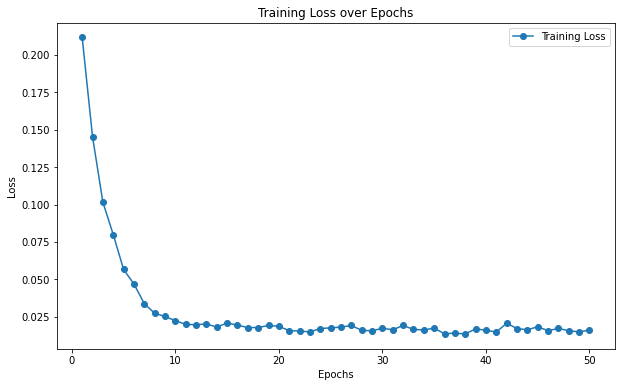

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

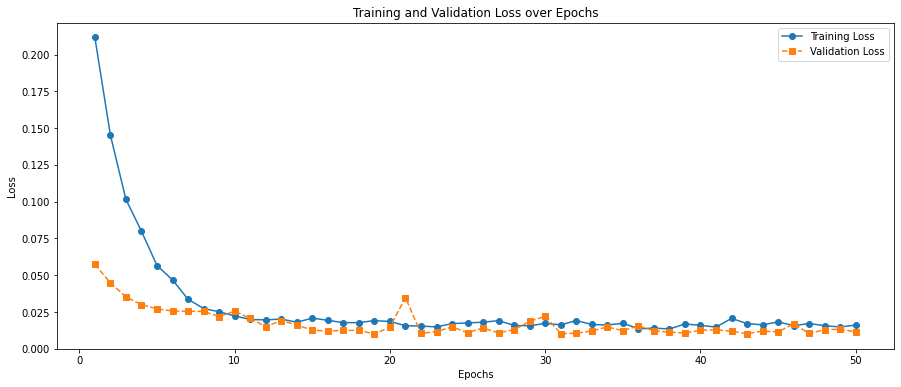

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model_LT3/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 6ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08924977211781282
MAE : 0.07273494851970672


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,37559.875000,112300.019
1,9503.075195,44787.893
2,-87411.578125,14909.156
3,111182.265625,54595.378
4,158084.734375,242829.930
5,351422.562500,406860.687
6,429852.937500,605897.837
7,621056.312500,654073.790
8,585165.750000,701143.910
9,613567.250000,657891.340


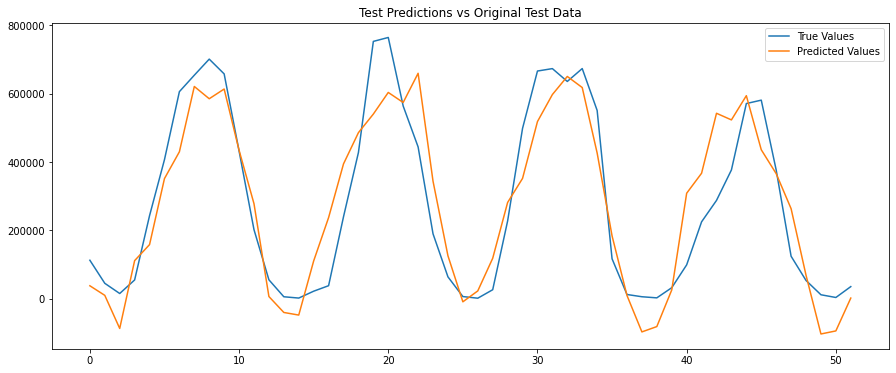

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 8ms/step


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

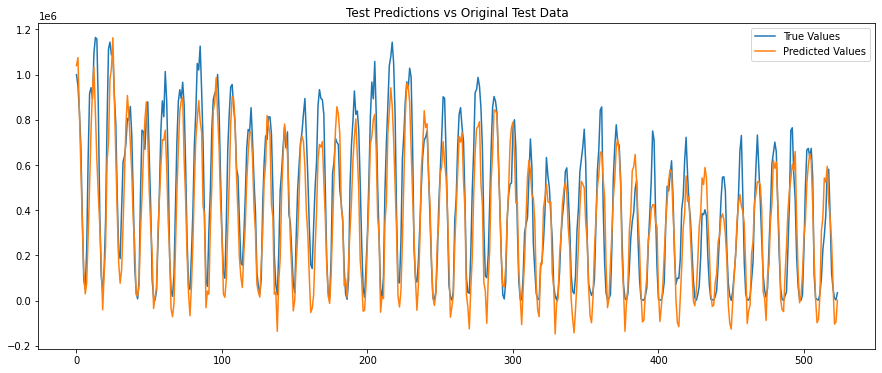

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()